In [1]:
from dataset import *
from helpers.ipython import *
from helpers.model import *
import random

%matplotlib inline

# Data

In [2]:
def get_y():
    return data.get('train', col='Category')

def get_X(dset='train'):
    return data.extract(dset, [
        ('data', ['X', 'Y']),
        ('data', ['DayOfWeek', 'PdDistrict', 'Address']),
        ('dates', ['year', 'month', 'week', 'hour', 'minute']),
        ('addr', ['street', 'corner']),
    ])

X, y = get_X(), get_y()

In [3]:
def random_weeks_select(df, num_years=10, num_weeks=1):
    select = df['year'] < 0
    years = range(2003, 2016)

    for y in range(0, num_years):
        year = random.choice(years)
        years.remove(year)
        weeks = range(0, 53, 2)
        
        for w in range(0, num_weeks):
            while True:
                week = random.choice(weeks)
                weeks.remove(week)
                sel = (df['year'] == year) & (df['week'] == week)
                if (len(df[sel]) > 0):
                    select = select | sel
                    break

    return select

# Model Parameters Tuning

In [8]:
select = X['year'].isin([2005, 2010])
X_train, X_eval, y_train, y_eval = skl.cross_validation.train_test_split(
    X[select], y[select], train_size=0.7, random_state=42
)

In [9]:
scores = pd.DataFrame(columns=['score', 'ntree', 'max_depth', 'min_child_weight'])
for md in range(3,10,2):
    for mcw in range(1,6,2):
        sys.stderr.write('max_depth - {}, min_child_weight - {}\n'.format(md, mcw))

        model = MultiClassXGB(n_estimators=1000, learning_rate=0.3, max_depth=md, min_child_weight=mcw)
        model.set_classes(y).set_eval(X_eval, y_eval, early_stopping_rounds=20)
        model.fit(X_train, y_train)

        scores = scores.append({
            'max_depth': md,
            'min_child_weight': mcw,
            'score': model.booster().best_score,
            'ntree': model.booster().best_ntree_limit,
        }, ignore_index=True)        

max_depth - 3, min_child_weight - 1
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.147186
[10]	validation_0-mlogloss:2.482694
[20]	validation_0-mlogloss:2.395326
[30]	validation_0-mlogloss:2.368134
[40]	validation_0-mlogloss:2.355088
[50]	validation_0-mlogloss:2.346726
[60]	validation_0-mlogloss:2.340412
[70]	validation_0-mlogloss:2.335127
[80]	validation_0-mlogloss:2.330131
[90]	validation_0-mlogloss:2.326790
[100]	validation_0-mlogloss:2.323601
[110]	validation_0-mlogloss:2.321689
[120]	validation_0-mlogloss:2.318969
[130]	validation_0-mlogloss:2.317125
[140]	validation_0-mlogloss:2.315545
[150]	validation_0-mlogloss:2.314903
[160]	validation_0-mlogloss:2.313872
[170]	validation_0-mlogloss:2.312513
[180]	validation_0-mlogloss:2.311659
[190]	validation_0-mlogloss:2.310882
[200]	validation_0-mlogloss:2.310163
[210]	validation_0-mlogloss:2.309672
[220]	validation_0-mlogloss:2.308841
[230]	validation_0-mlogloss:2.308480
[240]	validation_0-m

In [11]:
scores.sort_values('score')

,score,ntree,max_depth,min_child_weight
5,2.296444,108,5,5
7,2.296548,65,7,3
8,2.297650,66,7,5
4,2.298197,124,5,3
3,2.298693,108,5,1
6,2.299388,47,7,1
2,2.303111,332,3,5
11,2.303449,38,9,5
1,2.305653,277,3,3
10,2.305778,37,9,3


In [12]:
scores2 = pd.DataFrame(columns=['score', 'ntree', 'max_depth', 'min_child_weight'])
for md in [4, 5, 6]:
    for mcw in [4, 5, 6]:
        sys.stderr.write('max_depth - {}, min_child_weight - {}\n'.format(md, mcw))

        model = MultiClassXGB(n_estimators=1000, learning_rate=0.3, max_depth=md, min_child_weight=mcw)
        model.set_classes(y).set_eval(X_eval, y_eval, early_stopping_rounds=20)
        model.fit(X_train, y_train)

        scores2 = scores2.append({
            'max_depth': md,
            'min_child_weight': mcw,
            'score': model.booster().best_score,
            'ntree': model.booster().best_ntree_limit,
        }, ignore_index=True)  

max_depth - 4, min_child_weight - 4
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.115974
[10]	validation_0-mlogloss:2.454088
[20]	validation_0-mlogloss:2.368408
[30]	validation_0-mlogloss:2.344609
[40]	validation_0-mlogloss:2.332618
[50]	validation_0-mlogloss:2.323309
[60]	validation_0-mlogloss:2.317970
[70]	validation_0-mlogloss:2.314027
[80]	validation_0-mlogloss:2.309987
[90]	validation_0-mlogloss:2.306998
[100]	validation_0-mlogloss:2.304510
[110]	validation_0-mlogloss:2.302484
[120]	validation_0-mlogloss:2.301468
[130]	validation_0-mlogloss:2.300224
[140]	validation_0-mlogloss:2.299592
[150]	validation_0-mlogloss:2.299006
[160]	validation_0-mlogloss:2.298937
[170]	validation_0-mlogloss:2.298474
[180]	validation_0-mlogloss:2.298251
[190]	validation_0-mlogloss:2.298431
[200]	validation_0-mlogloss:2.298880
Stopping. Best iteration:
[182]	validation_0-mlogloss:2.298124

max_depth - 4, min_child_weight - 5
Will train until validation_0 e

In [13]:
scores2.sort_values('score')

,score,ntree,max_depth,min_child_weight
7,2.295266,80,6,5
5,2.295649,121,5,6
8,2.296003,78,6,6
6,2.296353,79,6,4
4,2.296444,108,5,5
3,2.297668,110,5,4
0,2.298124,183,4,4
2,2.298283,171,4,6
1,2.298814,188,4,5


In [14]:
scores3 = pd.DataFrame(columns=['score', 'ntree', 'gamma'])
for g in [i/10.0 for i in range(0,5)]:
    sys.stderr.write('gamma - {}\n'.format(g))

    model = MultiClassXGB(n_estimators=1000, learning_rate=0.3, max_depth=6, min_child_weight=5, gamma=g)
    model.set_classes(y).set_eval(X_eval, y_eval, early_stopping_rounds=20)
    model.fit(X_train, y_train)

    scores3 = scores3.append({
        'gamma': g,
        'score': model.booster().best_score,
        'ntree': model.booster().best_ntree_limit,
    }, ignore_index=True)  

gamma - 0.0
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.061784
[10]	validation_0-mlogloss:2.413942
[20]	validation_0-mlogloss:2.333930
[30]	validation_0-mlogloss:2.313497
[40]	validation_0-mlogloss:2.305408
[50]	validation_0-mlogloss:2.300625
[60]	validation_0-mlogloss:2.297026
[70]	validation_0-mlogloss:2.295637
[80]	validation_0-mlogloss:2.295459
[90]	validation_0-mlogloss:2.295947
Stopping. Best iteration:
[79]	validation_0-mlogloss:2.295266

gamma - 0.1
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.061774
[10]	validation_0-mlogloss:2.414263
[20]	validation_0-mlogloss:2.335211
[30]	validation_0-mlogloss:2.314187
[40]	validation_0-mlogloss:2.306344
[50]	validation_0-mlogloss:2.301806
[60]	validation_0-mlogloss:2.299371
[70]	validation_0-mlogloss:2.297033
[80]	validation_0-mlogloss:2.295794
[90]	validation_0-mlogloss:2.295661
[100]	validation_0-mlogloss:2.295973
[110]	validation_0-mlogl

In [15]:
scores3.sort_values('score')

,score,ntree,gamma
4,2.293897,93,0.4
3,2.295007,82,0.3
0,2.295266,80,0.0
2,2.295428,85,0.2
1,2.295661,91,0.1


In [17]:
scores4 = pd.DataFrame(columns=['score', 'ntree', 'gamma'])
for g in [0.45, 0.5]:
    sys.stderr.write('gamma - {}\n'.format(g))

    model = MultiClassXGB(n_estimators=1000, learning_rate=0.3, max_depth=6, min_child_weight=5, gamma=g)
    model.set_classes(y).set_eval(X_eval, y_eval, early_stopping_rounds=20)
    model.fit(X_train, y_train)

    scores4 = scores4.append({
        'gamma': g,
        'score': model.booster().best_score,
        'ntree': model.booster().best_ntree_limit,
    }, ignore_index=True)  

gamma - 0.45
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.061753
[10]	validation_0-mlogloss:2.413977
[20]	validation_0-mlogloss:2.335418
[30]	validation_0-mlogloss:2.314186
[40]	validation_0-mlogloss:2.306959
[50]	validation_0-mlogloss:2.302511
[60]	validation_0-mlogloss:2.299978
[70]	validation_0-mlogloss:2.298564
[80]	validation_0-mlogloss:2.297459
[90]	validation_0-mlogloss:2.298101
[100]	validation_0-mlogloss:2.297940
Stopping. Best iteration:
[82]	validation_0-mlogloss:2.297388

gamma - 0.5
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.061750
[10]	validation_0-mlogloss:2.414466
[20]	validation_0-mlogloss:2.335747
[30]	validation_0-mlogloss:2.317085
[40]	validation_0-mlogloss:2.308886
[50]	validation_0-mlogloss:2.303692
[60]	validation_0-mlogloss:2.299880
[70]	validation_0-mlogloss:2.298175
[80]	validation_0-mlogloss:2.296424
[90]	validation_0-mlogloss:2.295641
[100]	validation_0-mlog

In [18]:
scores4.sort_values('score')

,score,ntree,gamma
1,2.295502,96,0.50
0,2.297388,83,0.45


In [19]:
scores5 = pd.DataFrame(columns=['score', 'ntree', 'subsample', 'colsample_bytree'])
for s in [0.6, 0.7, 0.8, 0.9, 1.0]:
    for cb in [0.6, 0.7, 0.8, 0.9, 1.0]:
        sys.stderr.write('subsample - {}, colsample_bytree - {}\n'.format(s, cb))

        model = MultiClassXGB(n_estimators=1000, learning_rate=0.3, max_depth=6, min_child_weight=5, gamma=0.4,
            subsample=s, colsample_bytree=cb
        )
        model.set_classes(y).set_eval(X_eval, y_eval, early_stopping_rounds=20)
        model.fit(X_train, y_train)

        scores5 = scores5.append({
            'subsample': s,
            'colsample_bytree': cb,
            'score': model.booster().best_score,
            'ntree': model.booster().best_ntree_limit,
        }, ignore_index=True)

subsample - 0.6, colsample_bytree - 0.6
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.126597
[10]	validation_0-mlogloss:2.425286
[20]	validation_0-mlogloss:2.340758
[30]	validation_0-mlogloss:2.318621
[40]	validation_0-mlogloss:2.309615
[50]	validation_0-mlogloss:2.306844
[60]	validation_0-mlogloss:2.305323
[70]	validation_0-mlogloss:2.304673
[80]	validation_0-mlogloss:2.304798
[90]	validation_0-mlogloss:2.306337
Stopping. Best iteration:
[72]	validation_0-mlogloss:2.304605

subsample - 0.6, colsample_bytree - 0.7
Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-mlogloss:3.124648
[10]	validation_0-mlogloss:2.424572
[20]	validation_0-mlogloss:2.339721
[30]	validation_0-mlogloss:2.319628
[40]	validation_0-mlogloss:2.311095
[50]	validation_0-mlogloss:2.307867
[60]	validation_0-mlogloss:2.306843
[70]	validation_0-mlogloss:2.306996
[80]	validation_0-mlogloss:2.307806
Stopping. Best iteration:
[63]	validation

In [20]:
scores5.sort_values('score')

,score,ntree,subsample,colsample_bytree
22,2.290112,105,1.0,0.8
23,2.291617,101,1.0,0.9
20,2.292213,82,1.0,0.6
21,2.292366,87,1.0,0.7
15,2.292894,93,0.9,0.6
16,2.293443,80,0.9,0.7
24,2.293897,93,1.0,1.0
17,2.294567,98,0.9,0.8
18,2.294578,79,0.9,0.9
10,2.296692,80,0.8,0.6


# Model Train

In [4]:
def get_week_set():
    sel = random_weeks_select(X)
    return X[~sel], X[sel], y[~sel], y[sel]

X_train, X_eval, y_train, y_eval = data.store.load_or_create('week_set', get_week_set)

model = MultiClassXGB(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=5,
    gamma=0.4,
    subsample=1.0,
    colsample_bytree=0.8,
    seed=42,
)

model.set_classes(y)
model.set_eval(X_eval, y_eval, early_stopping_rounds=150)
model.set_model_file('tune')
model.fit(X_train, y_train)

# [299] validation_0-mlogloss:2.256305
# [590] validation_0-merror:0.680982 validation_0-mlogloss:2.237147
# [890] validation_0-merror:0.678031 validation_0-mlogloss:2.228999
# [1190] validation_0-merror:0.676516 validation_0-mlogloss:2.225366

Will train until validation_0 error hasn't decreased in 150 rounds.
[900]	validation_0-merror:0.677798	validation_0-mlogloss:2.228914
[910]	validation_0-merror:0.677720	validation_0-mlogloss:2.228728
[920]	validation_0-merror:0.677875	validation_0-mlogloss:2.228631
[930]	validation_0-merror:0.678225	validation_0-mlogloss:2.228531
[940]	validation_0-merror:0.677836	validation_0-mlogloss:2.228343
[950]	validation_0-merror:0.677798	validation_0-mlogloss:2.228211
[960]	validation_0-merror:0.677565	validation_0-mlogloss:2.228080
[970]	validation_0-merror:0.677332	validation_0-mlogloss:2.227924
[980]	validation_0-merror:0.677681	validation_0-mlogloss:2.227772
[990]	validation_0-merror:0.677565	validation_0-mlogloss:2.227630
[1000]	validation_0-merror:0.677487	validation_0-mlogloss:2.227471
[1010]	validation_0-merror:0.677448	validation_0-mlogloss:2.227314
[1020]	validation_0-merror:0.677565	validation_0-mlogloss:2.227192
[1030]	validation_0-merror:0.677332	validation_0-mlogloss:2.227048
[104

MultiClassXGB(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.4, learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=5, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1.0)

In [4]:
model = MultiClassXGB(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=5,
    gamma=0.4,
    subsample=1.0,
    colsample_bytree=0.8,
    seed=42,
)

model.set_classes(y)
model.set_model_file('tune_4_1')
model.fit(X, y)

MultiClassXGB(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.4, learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=5, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1.0)

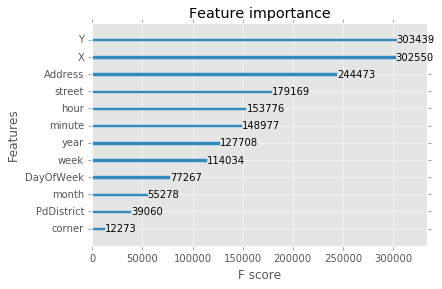

In [6]:
model.plot_importance()

# Model Submit

In [7]:
def get_proba(model, X):
    proba = model.predict_proba(X)
    proba_df = pd.DataFrame(proba, index=X.index, columns=model.classes_)

    proba_df.index.name = 'Id'
    return proba_df

def submit_model(model, name, float_format='%.6f'):
    proba = get_proba(model, get_X('test'))
    proba.to_csv('./output/{}.csv.gz'.format(name), compression='gzip', float_format=float_format)
    return proba

proba = submit_model(model, 'xgb_tune_4_1')
proba.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.002242,0.122841,0.000008,0.001162,0.065969,0.000453,0.013901,0.010474,0.003134,0.000931,...,0.000008,0.004745,0.000041,0.042986,0.000013,0.002789,0.045673,0.318457,0.027303,0.017185
1,0.000373,0.077429,0.000003,0.000541,0.002388,0.003880,0.036881,0.030481,0.002040,0.000026,...,0.000012,0.009690,0.000023,0.039812,0.000042,0.000705,0.008881,0.008646,0.085701,0.033211
2,0.009283,0.123755,0.000008,0.000443,0.096037,0.000895,0.001073,0.015554,0.004704,0.000061,...,0.000004,0.006427,0.000231,0.036305,0.000004,0.014386,0.079541,0.041713,0.015298,0.005823
3,0.003299,0.239127,0.000025,0.005788,0.032898,0.005863,0.001932,0.016407,0.013621,0.000089,...,0.000024,0.005324,0.000121,0.044885,0.000002,0.003679,0.080681,0.088000,0.021654,0.024996
4,0.003299,0.239127,0.000025,0.005788,0.032898,0.005863,0.001932,0.016407,0.013621,0.000089,...,0.000024,0.005324,0.000121,0.044885,0.000002,0.003679,0.080681,0.088000,0.021654,0.024996


In [9]:
data.store.save(model, 'model_xgb_tune_4_1')